<a href="https://colab.research.google.com/github/100477706/Proyecto_Aprendizaje/blob/main/predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IDENTIFICACIÓN DE ESTUDIANTES**

**Grupo de Trabajo**: 27

Gabriel José Rivera Amor - 100477706@alumnos.uc3m.es

Santiago José Díaz Rodríguez - 100479095@alumnos.uc3m.es

# **1. CARGA DE DATOS**

Mediante este apartado realizamos la carga de datos al Google Collab teniendo en cuenta que en cada ingreso a la aplicación se debe realizar la carga del dataset.

En este apartado se descomprime el archivo que se ha subido y se muestran los datos por pantalla.

In [ ]:
!ls

attrition_availabledata_06.csv.gz  sample_data


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import tree
import numpy as np
import time

In [ ]:
df = pd.read_csv("attrition_availabledata_06.csv.gz", compression="gzip", sep=",") #subir el archivo comprimido
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No


# **2. EDA**

En este apartado vamos a llevar a cabo Exploratory Data Analysis (EDA), el cual nos va a ayudar a entender el conjunto de datos antes de aplicar cualquier modelo o hipótesis de prueba. El EDA nos va a permitir establecer las tendencias, correlaciones y anomalías que se pueden encontar en los datos. Con este tipo de análisis podemos determinar cuál son los métodos a implementar y cuáles son las features indicadas a utilizar y que den una información relevante al momento de evaluar el modelo a desarrollar.

A continuación mostramos el contenido del archivo para verificar la cantidad de filas y columnas que tenemos, donde adicionalmente queremos verificar el tipo de datos que tenemos en nuestra base de datos. Para ello mostramos la información referente al contenido de la tabla.

In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2921 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2913 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14

A continuación utilizamos la función de descripción del dataset para que por cada una de las features (Columnas), podamos obtener valores estadísticos que nos permiten describir la función sabiendo los valores medios, la desviación y el cómo se distribuye los datos por cada feature. Adicionalmente es útil para el Exploratory Data Analysis (EDA), ya que nos ayuda a comprender las características de los datos antes de implementar el modelo.

In [ ]:
# Información total del dataset
print("\nContenido del Dataset:")
df.describe()


Contenido del Dataset:


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2921.000000,2928.000000,2913.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2926.000000,2940.000000,2940.0,2940.000000,2936.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.311828,12.688095,2.734014,3.156463,2.716878,2.705601,2.766564,36.959864,9.271088,2.909864,...,64855.948980,2.713260,15.256463,8.0,0.803741,11.469005,2.789456,7.042177,2.215986,4.117347
std,1.340066,5.494808,0.714883,0.363355,1.090252,1.098222,0.703519,9.137364,8.113162,1.024888,...,46800.380469,2.493371,3.652041,0.0,0.858827,7.837689,1.279125,6.125843,3.269241,3.563764
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.262869,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29405.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,6.997414,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,49070.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.896439,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,82240.000000,4.000000,18.000000,8.0,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


A continuación, procedemos con la contabilizacón de la cantidad de variables e instancias distintas que tenemos en el dataset, de tal forma de darnos una idea general de los datos con los que procederemos a trabajar.

In [ ]:
# Cantidad de variables e instancias
print(f"\nEl dataset tiene {df.shape[0]} instancias y {df.shape[1]} variables.")


El dataset tiene 2940 instancias y 31 variables.


Sabiendo los datos que tenemos a disposición, entonces vamos a proceder con identificar las variables que tiene nuestro modelo, clasificándolas como categóricas o numéricas. Este proceso nos va a permitir determinar si es necesaria una estandarización, decidir cuál es el mejor modelo para evaluar los datos que se tienen y corregir las variables numéricas en el caso de tener datos erróneos.

In [ ]:
# Identificar tipos de variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nVariables categóricas: {categorical_vars}")
print(f"\nVariables numéricas: {numerical_vars}")


Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']

Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Sabiendo y conociendo bien los diferentes tipos de variables que tenemos presente, ahora procedemos a identificar aquellas variables categóricas que tengan una alta cardinalidad. Es importante recordar que aquellas variables que tienen una alta cardinalidad son aquellas que tienen un gran número de valores únicos y lo cual nos ayuda a conocer si es necesario hacer agrupamientos para evitar que el entrenamiento del modelo se dificulte.

In [ ]:
# Identificar variables categóricas con alta cardinalidad
high_cardinality_vars = [col for col in categorical_vars if df[col].nunique() > 10]
print(f"\nVariables categóricas con alta cardinalidad: {high_cardinality_vars}")


Variables categóricas con alta cardinalidad: []


In [ ]:
# Identificar variables numéricas con alta cardinalidad (muchos valores únicos)
high_cardinality_numerical = [col for col in numerical_vars if df[col].nunique() > df.shape[0] * 0.9]
print(f"\nVariables numéricas con alta cardinalidad: {high_cardinality_numerical}")


Variables numéricas con alta cardinalidad: ['hrs', 'EmployeeID']


Posteriormente para realizar la limpieza de los datos, es necesario detectar aquellos valores que sean nulos, ya que estos pueden gerar inconvenientes al momento de hacer el entrenamiento del modelo. Luego de tener esta información, podemos decidir eliminar, imputar o gestionar dichos datos de tal forma que no generen errores al momento de contruir el modelo. Mediante la siguinte implementación, podemos conocer por cada una de las features, el número de valores nulos existentes.  

In [ ]:
# Valores nulos
def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print("\nValores nulos por columna:")
        print(missing)
    else:
        print("\nNo hay valores nulos en el dataset.")
missing_values(df)


Valores nulos por columna:
EnvironmentSatisfaction    19
JobSatisfaction            12
WorkLifeBalance            27
NumCompaniesWorked         14
TotalWorkingYears           4
dtype: int64


Luego, evaluamos si existe alguna columna de las presentes en el dataset proporcionado que tenga la condición de ser constante. Es importante mencionar que una columna constante es aquella que todas sus filas contienen un mismo valor. Por otro lado también tenemos la verificación de la existencia de una columna que contiene un código de verificación que identifica de alguna forma a los empleados de la empresa, siendo este un ID.

La identificación de estos dos tipos de columnas nos va a servir para retirarlas de la muestra con la que se entrenará el modelo, ya que estos dos tipos antes mencinados no genera ningún tipo de valor al modelo que se desea construir.

In [ ]:
# Identificar columnas constantes
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"\nColumnas constantes: {constant_cols}")

# Identificar columnas de ID
id_cols = [col for col in df.columns if 'id' in col.lower() or df[col].is_unique]
print(f"\nColumnas de ID: {id_cols}")


Columnas constantes: ['EmployeeCount', 'Over18', 'StandardHours']

Columnas de ID: ['EmployeeID']


Con este último apartado, pretendemos establecer si el problema al que nos estamos enfretando es de clasificación o de regresión. Con ello buscamos definir correctamente el modelo que queremos implementar y los elementos que se deben considerar para lograrlo, por lo que verificamos si "Attrition" es categórica o numérica. Adicionalmente, verificamos la distribución de la función objetivo de tal forma de verificar si esta se encuentra desbalancaeda o no.

Como se puede verificar a continuación, dado que la variable Attrition es categórica, entonces estamos ante un problema de clasificación, donde se puede verificar que nuestra función objetivo está desbalanceada, ya que tenemos un número muy alto de "No" contra muy pocos "Yes". Esto último nos va a permitir saber si el modelo debe ajustarse o no.


El problema es de clasificación.

Distribución de la variable objetivo:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

La variable objetivo está desbalanceada.


<ipython-input-29-1dd7eb712a7c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attrition'], palette='coolwarm')


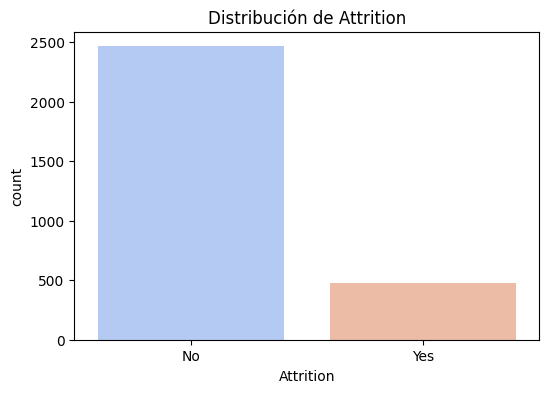

In [ ]:
# Determinar si es un problema de clasificación o regresión
if df['Attrition'].dtype == 'object' or df['Attrition'].nunique() < 10:
    print("\nEl problema es de clasificación.")

    # Evaluar desbalance de clases
    class_counts = df['Attrition'].value_counts(normalize=True)
    print("\nDistribución de la variable objetivo:")
    print(class_counts)
    if class_counts.min() < 0.3:
        print("\nLa variable objetivo está desbalanceada.")
else:
    print("\nEl problema es de regresión.")

# Visualización de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x=df['Attrition'], palette='coolwarm')
plt.title('Distribución de Attrition')
plt.show()


# **3. PROCESO DE EVALUACIÓN**

## **3.1. Estimacion del Rendimiento Futuro**

Para este apartado es necesario considerar el proceso utilizado para la estimación del rendmiento futuro, buscando asegurar que nuestro modelo se evalúe de manera realista en datos que no ha analizado con anterioridad. La idea principal es enterenar al modelo con un conjunto de datos y evaluarlo con otro, ya que si se hiciera con el mismo, puede dar una estimación sesgada del rendimiento real.

Para lograr esto, hacemos una partición entre los elementos del dataset que disponemos, donde dividimos el conjunto de ejemplos se va a dividir en dos conjuntos y cuyos elementos se escogen aleatoriamente del conjunto disponible. Esto nos va a permitir establecer un conjunto de métricras que van a permitir evaluar el problema de forma consecuente y concreta.

La primera de estás métricas se conoce como **balanced accuracy**, la cual utilizaremos ya que conocemos del EDA que las clases se encuentran desbalanceadas. Este procedimiento nos va a permitir que el modelo no prediga que los datos de prueba siempre dan como resultado "NO", sino que le coloque el mismo peso al "SI" como al "NO". Para ello, es necesario tener en consideración la métrica de los datos que indica que los datos han sido correctamente identificados como positivos (TPR) y crrectamente identificados como negativos (TNR).

Esto lo hacemos ya que para obtener la **balanced accuracy** es necesario hacer la media entre la TPR y la TNR (TPR + TPN / 2). La idea de hacer este proceso es que se pueda evaluar el rendimiento del modelo de forma justa en el caso de clases desbalanceadas y que el modelo pueda aprender verdaderamente a distinguir entre ambas clases presentes y no la mayoritaria.

Teniendo en consideración que se debe obtner el TPR y TPN, entonces también será necesario obtener las matrices de confunsión, las cuales nos permiten saber el rendimiento del modelo de clasificación que vamos a aplicar en los siguientes apartados, ya que nos va a dar información acerca del acierto de las predicciones, clasificándolas como falsos postivos, falsos negativos, verdadero negativo o verdadero positivo. Este procedimiento se realiza para entender los errores del modelo y poder calcular el TPR (definido como TPR = TP / TP + FN) y el TNR (definido como TPR = TN / TN + FP), los cuales son necesarios para verificar que el modelo evalue de forma justa.

## **3.2. División de Datos entre Train y Test**

Para poder llevar a cabo el holdout es necesario implementar una división de los datos en dos conjuntos y escogidos de forma aleatoria. La idea principal es establecer un conjunto de datos que serán aquellos con los que entrenaremos el modelo y se realizará con 2/3 de los datos disponibles. Luego tendremos el conjunto de prueba, el cual está compuesto por un 1/3 de los datos disponibles y que van a prbar que el modelo funciona correctamente y hace la estimación correcta.

El objetivo principal de realizar esta operación es evitar el sobreajuste o overfitting, el cual se da cuando entrenamos con todos los datos disponibles y el modelo se "entrena" memorizando los datos envés de identifacar los patrones principales. Esto va a generar que al momento de introducir nuevos datos al modelo, este sea incapaz de dar una solución, ya que solo tiene solución para los datos con los que practicó y no para cualquier dato.

Por ende, es necesario realizar la división en los dos conjuntos, ya que gracias a ella somos capaces de verificar que nuestro modelo no solo hace una buena predicción con los datos de entrenamiento, sino que también lo hace con un conjunto de datos que es nuevo y que el modelo desconoce. Si el modelo hace las predicciones correctas, entonces nuestra estructura considerará un modelo con los datos de train y test.

Sabiendo esto, entonces debemos determinar los modelos que se van a evaluar y cuál de ellos es la mejor opción para lo que estamos buscando obtener.

## **3.3. Evaluación interna**

# **4. MÉTODOS BÁSICOS: KNN AND TREES**

## **4.1. Elección de Métodos del KNN**

Para iniciar este proceso es necesario dividir en los conjuntos de train y test, como se mencionó en el apartado anterior, donde debemos retirar de esta división aquellas columnas que no agregan ningún valor relevante al entrenamiento del modelo. Estas columnas son aquellas que pudimos revisar en el EDA que son constantes o, mejor definido, que todas las filas de dicha columna tienen el mismo valor.

Adicionalmente, se debe retirar la columna que identifica a los empleados, ya que, esta columna no tiene ningún aporte al modelo que deseamos implementar.

Por último, pero no menos importante, debemos realizar dos modificaciones importantes con las variables categóricas. La primera de ellas consiste en que es necesario retirar los NaN que se encuentran en las variables categóricas, ya que no podrán ser procesadas. Para ello es necesario realizar una imputación en las que se coloque una denominación que sea "Desconocido" para evitar un sesgo que pudiera generarse si la imputación se realizace por el más frecuente.

Por otro lado, la segunda de las modificaciones consiste en otorgarle un valor númerico a las variables categóricas, ya que los modelos de Machine Learning no pueden procesar dichas variables. Para lograrlo, se aplica el proceso de One-Hot Encoding, el cual consiste en crear columnas binarias para cada una de las variables categóricas.

In [ ]:
# Quitamos los NaN de las variables categóricas
cat_imputer = SimpleImputer(strategy='constant', fill_value='Desconocido')
df[categorical_vars] = cat_imputer.fit_transform(df[categorical_vars])

# One-Hot Encoding para las variables categóricas
categorical_vars = [col for col in categorical_vars if col not in ['Attrition', 'EmployeeID', 'Over18']]
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Quitamos columnas irrelevantes
X = df_encoded.drop(columns = ['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID'])
# Como la variable 'Attrition' es YES o NO, entonces la convertimos a un valor
# binario para el modelo
y = df['Attrition'].map({'Yes': 1, 'No': 0})

# Hacemos la división entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42)


Una vez realizada la división de los datos disponibles en los dos conjuntos de train y test, con una pequeña línea de código verificamos que la función se encuentra totalmente desbalanceada. Es importante mencionar que el resultado obtenido es la proporción de cada uno de los valores binarios que se definieron para la columna de 'Attrition' en el apartado anterior.  

In [ ]:
y_train.value_counts(normalize=True)

,proportion
Attrition,
0,0.839005
1,0.160995


Una vez que hacemos este prerocesado de los datos, entonces procesedemos a aplicar los algoritmos correspondientes al modelo KNN de clasificación. Para ello, debemos cosiderar todas las posibilidades con respecto a los modelos de escalado y de imputación que considera el KNN.

Para poder llevar a cabo el entrenamiento del modelo, primero es imperativo decidir cuál de los modelos es el que da mejores resultados. Para ello usamos el método de validación cruzada para verificar el cuál de los métodos existentes es el más apropiado.

Por otro lado, es importante mencionar que en el apartado 3 se mencionó que utilizaríamos el método de Holdout para la fase de entrenamiento, y se puede prestar a confunsión que ahora se mencione el uso de la validación cruzada. Por ello, es importante hacer un insiso en este aspecto, destacando que usamos la validación cruzada para verificar el mejor método, pero al momento de hacer el entrenamiento final, se va a hacer uso del Holdout.

Teniendo esto en cuenta, en el código que se encuentra a continuación se podrá observar como haremos todas las combinaciones entre los tres métodos de escalado y los dos de imputación.

In [42]:
# Establecemos una lista de los métodos de escaldo
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]

# Establecemos una lista de los métodos de imputación
imputers = [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median')]

# Establecemos un diccionario con la combinación entre el método de escalado,
# el método de imputación y el resultado de la estimación como claves del diccionario
results = {}
# Establecemos la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Realizamos la validación cruzada para cada combinación de escalado y imputación
for scaler in scalers:
    for imputer in imputers:
        pipe = Pipeline([
            ('imputer', imputer),
            ('scaler', scaler),
            ('knn', KNeighborsClassifier())
        ])

        scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv)
        results[f"{scaler.__class__.__name__} + {imputer.strategy}"] = np.mean(scores)
        print(f"{scaler.__class__.__name__} + {imputer.strategy}: {np.mean(scores)}")

MinMaxScaler + mean: 0.838095238095238
MinMaxScaler + median: 0.8377551020408163
StandardScaler + mean: 0.8428571428571429
StandardScaler + median: 0.8428571428571429
RobustScaler + mean: 0.8496598639455784
RobustScaler + median: 0.85


Se debe mencionar de lo que se puede apreciar de código algunos aspectos importantes que nos van a ayudar a entender el proceso que estamos llevando a cabo. Primeramente, es necesario mencionar que usamos el "StratifiedKFold" envés del "KFold" ya que sabemos por el EDA que estamos ante un problema desblanceado, por lo que es preferible utilizar el primero de estos dado que ayuda a que la distribución de las clases sea similar y evita el surgimiento de errores futuros.

Por otro lado, podemos observar después de su ejecución la cantidad de elementos que se encuentran clasificados correctamente con cada una de las combinaciones entre métodos de escalado y de imputación. De todos los resultados obtenidos, es necesario establecer cuál de las combinaciones es la más idónea.  

In [43]:
# Establecemos cuál de las combinaciones es la que tiene mejor accuracy
best_method = max(results, key=results.get)
print("\nMejor combinación de escalado e imputación:", best_method)


Mejor combinación de escalado e imputación: RobustScaler + median


Una vez determinado la mejor combinación de métodos para que el modelo a entrenar tenga un mejor accuracy, entonces establecemos que el modelo KNN que se utilizará para el entrenamiento será el de "RobustScaler" como método de escalado, combinado con "median" como método de imputación.

## **4.2. Comparación entre el KNN y Trees**

Una vez que se ha establecido el método KNN que se va a utilizar para el entrenamiento del modelo, vamos a establecer las diferencias entre el uso de KNN y Árboles de Decisión (Trees). Para lograrlo, primero estableceremos una evaluación en la cual no se considera modificar los hiperparámetros y posteriormente otra en la que si se ven modificados. En este caso para el KNN utilizaremos la combinación antes mencionada y considerando que se hace el método de Holdout.

### **4.2.a. Evaluación con Hiperparámetros por Omisión**

Para realizar la primera evaluación, se debe considerar que simplemente realizamos el entrenamiento del modelo con el método de KNN y luego con los Árboles de Derivación. Es importante mencionar que en el punto 4.1, se adelantó el proceso de división del conjunto de datos disponibles en Train y Test, por lo que lo único que nosotros debemos realizar en este apartado es retirar los NaN de las variables numéricas y hacer el entrenamiento.

El retiro de las NaN de las variables numéricas se realiza por el método de imputación anteriormente establecido, el cual es "median". Esta misma especificación se utilizará para el entrenamiento del KNN como se puede apreciar a continuación.  

In [53]:
# Retiramos las NaN de las variables numéricas
# Aseguramos que numerical_vars solo contenga columnas existentes
numerical_vars = [col for col in numerical_vars if col in X_train.columns]

# Aplicamos imputación solo a las variables numéricas presentes
num_imputer = SimpleImputer(strategy='median')
X_train[numerical_vars] = num_imputer.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = num_imputer.transform(X_test[numerical_vars])

# Modelo KNN con hiperparámetros por omisión
knn_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier())
])

# Medimos el tiempo de entrenamiento
start_time_KNN = time.time()
knn_pipe.fit(X_train, y_train)
end_time_KNN = time.time()
training_time_KNN = end_time_KNN - start_time_KNN

# Establecemos la predicción del modelo
y_pred_knn = knn_pipe.predict(X_test)

# Verificamos el accuracy del modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)

Una vez realizamos el entrenamiento del modelo KNN, procedemos a imprimir por pantalla los resultados obtenidos. Adicionalmente se procede a imprimir la matriz de confusión, la cual nos va mostrar los verdaderos positivos (TPR), los falsos negativos (FNR), los falsos positivos (FPR) y los verdaderos negativos (TNR) respectivamente. Estos datos nos van a servir, junto al resto, para determinar si el modelo se ajusta más a las necesidades del problema cuando se realice la comparación los Árboles de Decisión.

In [63]:
print(f"\033[1mEvaluación del modelo KNN\033[0m")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Tiempo de entrenamiento: {training_time_KNN:.4f} segundos")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_knn)}")

Evaluación del modelo KNN
Accuracy: 0.8610
Tiempo de entrenamiento: 0.0793 segundos
Matriz de Confusión:
[[793  21]
 [114  43]]


Una vez vistos los resultados obtenidos del entrenamiento con el modelo KNN, entonces procedemos a realizar el mismo procedimiento con Árboles de Derivación. Es importante mencionar que los datos de entrenamiento son los mismos que los utilizados para el KNN, por lo que no es necesario volver a ejecutar el código de eliminación de las NaN. El procedimiento de entrenamiento se visualiza a continuación.

In [61]:
# Modelo Derivation Tree con hiperparámetros por omisión
dt = tree.DecisionTreeClassifier(random_state=42)

# Medimos el tiempo de entrenamiento
start_time_dt = time.time()
dt.fit(X_train, y_train)
end_time_dt = time.time()
training_time_dt = end_time_dt - start_time_dt

# Establecemos la predicción del modelo
y_pred_dt = dt.predict(X_test)

# Verificamos el accuracy del modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)

Una vez realizado el entrenamiento del Árbol de Derivación, procedemos a verificar los resultados obtenidos de la misma manera en que lo hemos realizado con el modelo KNN. Para ello, nuevamente es necesario verificar los mismos aspectos que antes como el tiempo de entrenamiento o la matriz de confunsión.

In [64]:
print(f"\033[1mEvaluación del modelo Derivation Tree\033[0m")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Tiempo de entrenamiento: {training_time_dt:.4f} segundos")
print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_dt)}")

Evaluación del modelo Derivation Tree
Accuracy: 0.8939
Tiempo de entrenamiento: 0.0304 segundos
Matriz de Confusión:
[[751  63]
 [ 40 117]]


#*Código Boceto*

**---------------------------------------------------------------------------------------------------------------**

In [49]:
# Implementación de modelos básicos con tiempo de entrenamiento

def train_model(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = model.predict(X_test)
    print(f"\nEvaluación del modelo {model_name}:")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Recall (TPR): {recall_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")

# Asegurar que numerical_vars solo contenga columnas existentes
numerical_vars = [col for col in numerical_vars if col in X_train.columns]

# Aplicar imputación solo a las variables numéricas presentes
num_imputer = SimpleImputer(strategy='median')
X_train[numerical_vars] = num_imputer.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = num_imputer.transform(X_test[numerical_vars])

# Modelos con hiperparámetros por omisión
dt = DecisionTreeClassifier(random_state=42)
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier())
])

train_model(dt, X_train, y_train, X_test, y_test, "Decision Tree")
train_model(knn_pipeline, X_train, y_train, X_test, y_test, "KNN con Imputación y Escalado")


Evaluación del modelo Decision Tree:
Balanced Accuracy: 0.8339
Accuracy: 0.8939
Recall (TPR): 0.7452
Confusion Matrix:
[[751  63]
 [ 40 117]]
Tiempo de entrenamiento: 0.0287 segundos

Evaluación del modelo KNN con Imputación y Escalado:
Balanced Accuracy: 0.6240
Accuracy: 0.8610
Recall (TPR): 0.2739
Confusion Matrix:
[[793  21]
 [114  43]]
Tiempo de entrenamiento: 0.0247 segundos


**--------------------------------------------------------**

In [ ]:
# Modelos con hiperparámetros por omisión
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
train_model(dt, X_train, y_train, X_test, y_test, "Decision Tree")
train_model(knn, X_train, y_train, X_test, y_test, "KNN")

# Ajuste de hiperparámetros
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
knn_params = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='balanced_accuracy')
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='balanced_accuracy')

train_model(dt_grid, X_train, y_train, X_test, y_test, "Decision Tree (HPO)")
train_model(knn_grid, X_train, y_train, X_test, y_test, "KNN (HPO)")

# Visualización del efecto de los hiperparámetros
def plot_hyperparameter_effects(results, param_name, title):
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=results[param_name], y=results['mean_test_score'])
    plt.xlabel(param_name)
    plt.ylabel('Balanced Accuracy')
    plt.title(title)
    plt.show()

plot_hyperparameter_effects(pd.DataFrame(dt_grid.cv_results_), 'param_max_depth', 'Efecto de max_depth en Decision Tree')
plot_hyperparameter_effects(pd.DataFrame(knn_grid.cv_results_), 'param_n_neighbors', 'Efecto de n_neighbors en KNN')
